# linear regression - solutions with different methods

In [203]:
import random
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [204]:
x = np.random.randn(50)

In [205]:
y = 0.5 + 3*x + 0.7*np.random.randn(50)

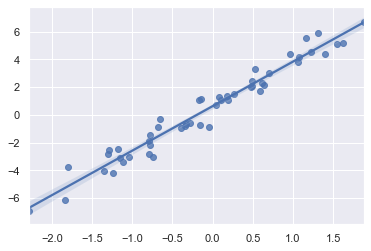

In [206]:
sns.set_theme(style="darkgrid")
sns.regplot(x=x,y=y)
plt.show()

# linear regression

In [207]:
X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1,1), y, test_size=0.33, random_state=42)

In [208]:
reg = LinearRegression().fit(X_train, y_train)
print("reg.score is for train",reg.score(X_train, y_train))
print("reg.score is for test",reg.score(X_test, y_test))
print("reg.coef is ",reg.coef_)
print("reg.intercept is ", reg.intercept_)
y_pred=reg.predict(X_test)

reg.score is for train 0.9634245417688673
reg.score is for test 0.9475089619920818
reg.coef is  [3.14312366]
reg.intercept is  0.6324214613641443


In [209]:
print("r2_score is ",r2_score(y_test, y_pred))

r2_score is  0.9475089619920818



# matrix

In [210]:
dx = x.reshape(-1,1)
dx = np.hstack((np.ones((dx.shape[0],1)),dx))

In [211]:
w=(np.linalg.inv(dx.T@dx))@dx.T@y

In [212]:
print("The line formula is ",w[0],"+",w[1],"* x")

The line formula is  0.6238606871122564 + 3.2110898605265166 * x


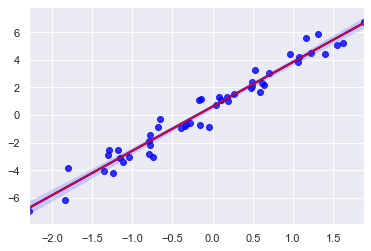

In [213]:
sns.set_theme(style="darkgrid")
sns.regplot(x=x,y=y, color="blue")
dy = w[0] + w[1]*x
sns.lineplot(x=x, y=dy, color="red")
plt.show()


# grad_descent

In [214]:
np.random.normal(size=[2, 1])

In [265]:
def grad_descent(x,y,iter,alpha):
    loss = []
    b = np.random.normal(size=[2, 1])
    for i in range(iter):
        y_pred = x@b
        loss.append(np.sum((y_pred-y)**2))
        dl=(2/x.shape[0])*x.T@(x@b-y.reshape(-1,1))
        if loss[-1] > 0.0004:
            b-=alpha*dl
    return b         
        

In [266]:
grad_descent(dx,y,1000,0.02)

array([[0.62386069],
       [3.21108986]])

In [267]:
print("The line formula is ",grad_descent(dx,y,1000,0.02)[0],"+",grad_descent(dx,y,1000,0.02)[1],"* x")

The line formula is  [0.62386069] + [3.21108986] * x


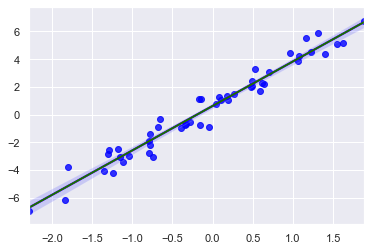

In [268]:
sns.set_theme(style="darkgrid")
sns.regplot(x=x,y=y, color="blue")
dy = w[0] + w[1]*x
sns.lineplot(x=x, y=dy, color="red")
dy1=grad_descent(dx,y,1000,0.02)[0]+grad_descent(dx,y,1000,0.02)[1]*x
sns.lineplot(x=x, y=dy1, color="green")
plt.show()


# neuron

In [258]:
nx=x.reshape(-1,1)

In [ ]:
input_size=1
output_size=1
models = tf.keras.Sequential([tf.keras.layers.Dense(output_size)])
custom_optimizer=tf.keras.optimizers.SGD(learning_rate=0.02)
models.compile(optimizer=custom_optimizer,loss='mean_squared_error')
models.fit(nx,y,epochs=100,verbose=1)
weights=models.layers[-1].get_weights()

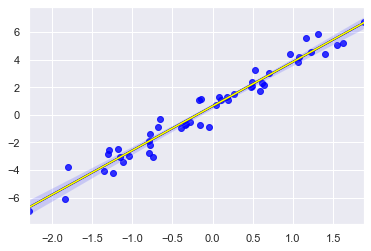

In [305]:
sns.set_theme(style="darkgrid")
sns.regplot(x=x,y=y, color="blue")
dy = w[0] + w[1]*x
sns.lineplot(x=x, y=dy, color="red")
dy1=grad_descent(dx,y,1000,0.02)[0]+grad_descent(dx,y,1000,0.02)[1]*x
sns.lineplot(x=x, y=dy1, color="green")
dy2=weights[1][0]+weights[0][0][0]*x
sns.lineplot(x=x, y=dy2, color="yellow")
plt.show()

In [344]:
class Lin_reg:
    def __init__(self, lr, my_iter):
        self.lr=lr
        self.iter=my_iter
              
    def fit(self,x,y):
        self.x=x
        self.y=y.reshape(-1,1)
        loss=[]
        self.w=np.random.normal(size=[self.x.shape[1], 1])
        self.b=np.random.randn()
        for i in range(self.iter):
            y_pred = self.predict(self.x)
            loss.append(np.sum((y_pred-self.y)**2))
            dl_dw = (2 * (self.x.T)@(y_pred - self.y))/self.x.shape[0]
            dl_db = (2 * np.sum(y_pred - self.y))/self.x.shape[0]
            if dl_dw.all() >=0.004 and dl_db >= 0.004:
                self.w -= self.lr * dl_dw
                self.b -= self.lr * dl_db
        return (self.w,self.b)    
 
    def predict(self, x):
        return np.dot(x,self.w) + self.b
    
    def score(self,x,y):
        ss_total = 0
        ss_res = 0
        for i in range(x.shape[0]):            
            ss_total += (y[i]-np.mean(y))**2
            ss_res += (y[i]-self.predict(x[i]))**2
        return 1-(ss_res/ss_total)


In [345]:
print(np.random.normal(size=[3, 1]))

[[1.9312404 ]
 [1.51279204]
 [1.10255946]]


In [381]:
my_reg=Lin_reg(lr=0.02,my_iter=2000)

In [382]:
W = my_reg.fit(X_train, y_train)

In [383]:
print(my_reg.score(X_test,y_test))


[0.9246961]


In [384]:
print(my_reg.score(X_train,y_train))

[0.95213655]


In [385]:
print("The line formula is ",W[1],"+",W[0][0][0],"* x")

The line formula is  0.5893717487212692 + 2.8029033797199108 * x


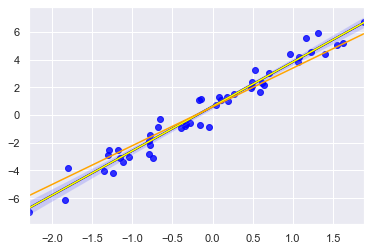

In [386]:
sns.set_theme(style="darkgrid")
sns.regplot(x=x,y=y, color="blue")
dy = w[0] + w[1]*x
sns.lineplot(x=x, y=dy, color="red")
dy1=grad_descent(dx,y,1000,0.02)[0]+grad_descent(dx,y,1000,0.02)[1]*x
sns.lineplot(x=x, y=dy1, color="green")
dy2=weights[1][0]+weights[0][0][0]*x
sns.lineplot(x=x, y=dy2, color="yellow")
dy3=W[1]+W[0][0][0]*x
sns.lineplot(x=x, y=dy3, color="orange")
plt.show()